# Test

This notebook tests the functions and classes in myimagelib.

In [1]:
import requests
import matplotlib.pyplot as plt
from io import BytesIO
from skimage.io import imread
google_download_handle = "https://drive.google.com/uc?export=download&id={}"
import numpy as np
import cv2
from myimagelib import show_progress, to8bit, bestcolor, rawImage, imfindcircles, xy_bin, to_dataframe, to_matrix, compact_PIV

## `myImageLib`

### `show_progress`

In [19]:
show_progress(0.5, label="test", bar_length=40)

### `to8bit`

1. Download the test image.

In [5]:
# Download condensation image from the cloud
url = google_download_handle.format("1OTTXhvSrfgPmFcqjTQEaam9e5vgSEP79")  # replace with your image URL
response = requests.get(url, stream=True)
img = imread(BytesIO(response.content))

2. Convert to 8-bit and enhance the contrast.

(np.float64(-0.5), np.float64(399.5), np.float64(499.5), np.float64(-0.5))

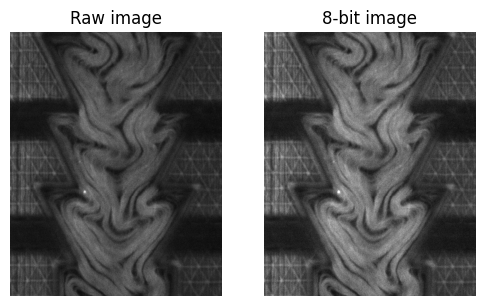

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(6, 4))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Raw image")
ax[0].axis("off")
# Convert to 8-bit and enhance contrast
img8 = to8bit(img)
ax[1].imshow(img8, cmap="gray")
ax[1].set_title("8-bit image")
ax[1].axis("off")

### `imfindcircles`

1. Download the test image.

In [7]:
# Download condensation image from the cloud
url = google_download_handle.format("1LFRt5ozQjJ_WVrWBoPQOFVNl5ZWb8ytP")  # replace with your image URL
response = requests.get(url, stream=True)
img = imread(BytesIO(response.content))

(np.float64(-0.5), np.float64(3935.5), np.float64(2623.5), np.float64(-0.5))

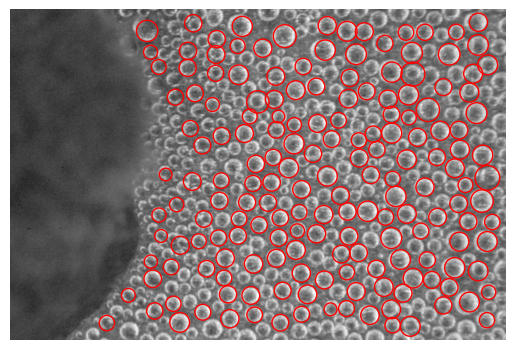

In [9]:
# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")
# find circles
circles = imfindcircles(gray, [50, 100], edge_width=10, smooth_window=21)
for _, row in circles.iterrows():
    circ = plt.Circle((row["x"], row["y"]), row["r"], color='r', fill=False)
    plt.gca().add_patch(circ)
plt.axis("off")

### `xy_bin`

1. Generate dense data

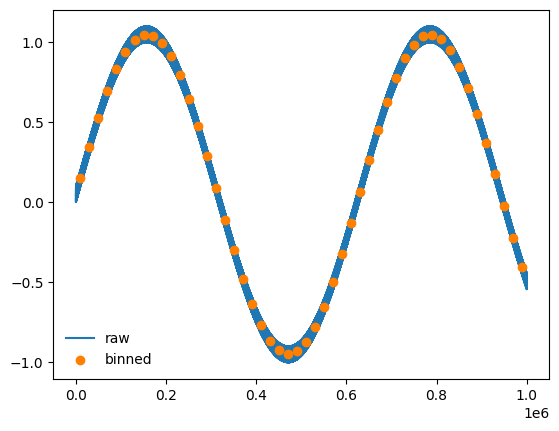

In [10]:
# craete a dense data
s = int(1e6)
x = np.arange(s)
y = np.sin(0.00001*x) + np.random.rand(s)*.1
# plot
plt.plot(x, y, label="raw")
xb, yb = xy_bin(x, y, n=50, mode="lin")
plt.scatter(xb, yb, color=bestcolor(1), label="binned", zorder=10)
plt.legend(frameon=False)

### `bestcolor`

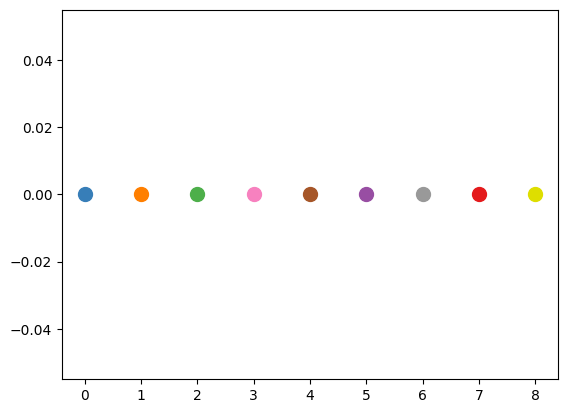

In [12]:
for i in range(9):
    plt.scatter(i, 0, s=100, color=bestcolor(i))

## `pivLib`

In [3]:
# create example PIV data x, y, u, v
xx = np.linspace(0, 50)
yy = np.linspace(0, 50)
x, y = np.meshgrid(xx, yy)
u = np.random.rand(*x.shape)
v = np.random.rand(*x.shape)

### `to_dataframe`

In [4]:
pivData = to_dataframe(x, y, u, v)
pivData.head()

,x,y,u,v
0,0.000000,0.0,0.613754,0.216997
1,1.020408,0.0,0.653888,0.080747
2,2.040816,0.0,0.026480,0.789708
3,3.061224,0.0,0.626036,0.780836
4,4.081633,0.0,0.792770,0.484960


### `to_matrix`

In [5]:

x, y, u, v = to_matrix(pivData)

## `corrLib`

In [6]:
from myimagelib.corrLib import corrS, corrI, divide_windows, distance_corr, \
    density_fluctuation, local_df, compute_energy_density, compute_wavenumber_field, \
        energy_spectrum, autocorr1d, vacf_piv

/Users/zhengyang/Documents/GitHub/mylib/myimagelib/corrLib.py:201: SyntaxWarning: invalid escape sequence '\p'
  >>> pivData = pd.read_csv(r'E:\\moreData\\08032020\piv_imseq\\01\\3370-3371.csv')
/Users/zhengyang/Documents/GitHub/mylib/myimagelib/corrLib.py:299: SyntaxWarning: invalid escape sequence '\i'
  * Nov 30, 2020 -- The energy spectrum calculated by this function shows a factor of ~3 difference when comparing \int E(k) dk with v**2.sum()/2


### `corrS`

In [7]:
x, y, u, v = to_matrix(pivData)
X, Y, CA, CV = corrS(x, y, u, v)

(<matplotlib.image.AxesImage at 0x146592ff0>,
 (np.float64(-0.5), np.float64(24.5), np.float64(24.5), np.float64(-0.5)))

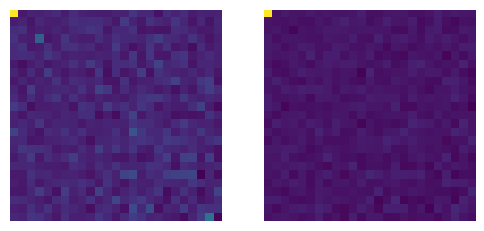

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(6, 4))
ax[0].imshow(CA), ax[0].axis("off")
ax[1].imshow(CV), ax[1].axis("off")

### `divide_windows`

In [12]:
I0 = np.random.rand(500, 500)
X, Y, I = divide_windows(I0, windowsize=[32, 32])

(np.float64(-0.5), np.float64(46.5), np.float64(46.5), np.float64(-0.5))

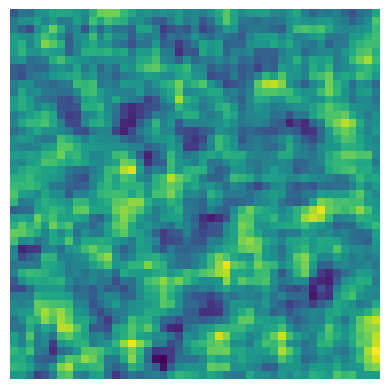

In [13]:
plt.imshow(I)
plt.axis("off")

### `distance_corr`

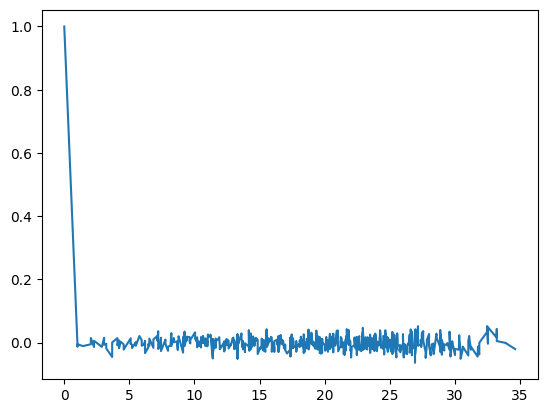

In [14]:
X, Y, CA, CV = corrS(x, y, u, v)
dc = distance_corr(X, Y, CV)
plt.plot(dc.R, dc.C)

### `energy_spectrum`

In [15]:
es = energy_spectrum(pivData, d=25*0.33)

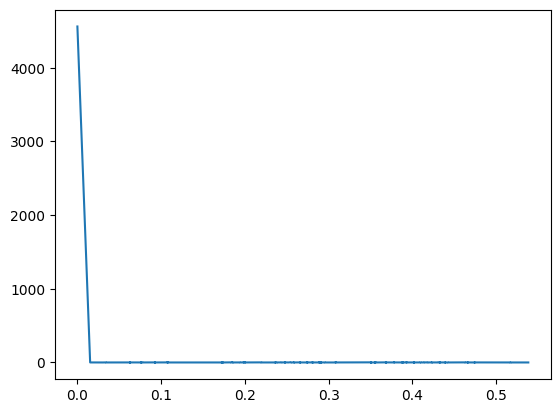

In [16]:
plt.plot(es.k, es.E)

### `autocorr1d`

In [17]:
t = np.linspace(0, 10)
x = np.sin(t)
corr, t = autocorr1d(x, t)

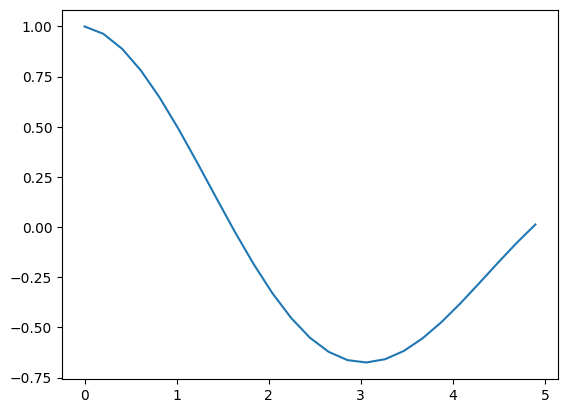

In [18]:
plt.plot(t, corr)